# 프로젝트 설명

In [1]:
import sys
sys.path.append("..") 

In [2]:
from src.utility import *
project_name = "dual_attention"
createfolder("./data")
createfolder("./model")
createfolder("./result")
createfolder("./graph")

# Data load

In [3]:
raw_data = loadfile('./data', "raw data", 'csv')
display(raw_data.info())
display(raw_data.describe())

csv file is loaded from ./data/raw data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83701 entries, 0 to 83700
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            83701 non-null  int64  
 1   Day              83701 non-null  int64  
 2   Hour             83701 non-null  int64  
 3   Minute           83701 non-null  int64  
 4   FT-3061-2        83701 non-null  float64
 5   TT-3061-1        83701 non-null  float64
 6   TT-3061-2        83701 non-null  float64
 7   PT-3061-2        83701 non-null  float64
 8   FT-3061-4        83701 non-null  float64
 9   TT-3061-5        83701 non-null  float64
 10  TT-3061-3        83701 non-null  float64
 11  TT-3061-4        83701 non-null  float64
 12  TT-3061-6        83701 non-null  float64
 13  PT-3061-3 (old)  83701 non-null  float64
 14  LT-3061-2        83701 non-null  float64
 15  FT-3061-3        83701 non-null  float64
 16  FT-3062-1     

None

,Month,Day,Hour,Minute,FT-3061-2,TT-3061-1,TT-3061-2,PT-3061-2,FT-3061-4,TT-3061-5,TT-3061-3,TT-3061-4,TT-3061-6,PT-3061-3 (old),LT-3061-2,FT-3061-3,FT-3062-1
count,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000,83701.000000
mean,11.139795,15.541977,11.477318,29.499648,29.559141,29.222028,25.539743,-0.430313,22.591501,30.624912,48.269577,66.736512,63.175855,-0.329969,28.591552,56.274025,24.231841
std,0.681425,8.967264,6.931991,17.318402,35.428486,21.361876,17.809541,0.475763,26.384841,22.120893,39.597746,55.663624,51.600359,0.375344,30.572621,62.235262,31.711250
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.993000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.940000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,5.000000,14.000000,0.000000,8.000000,7.100000,-0.960000,0.000000,6.800000,7.000000,8.700000,8.900000,-0.720000,0.000000,0.000000,0.000000
50%,11.000000,15.000000,11.000000,29.000000,0.800000,17.600000,25.000000,-0.013000,0.000000,40.600000,38.500000,62.000000,60.600000,-0.015000,24.200000,0.000000,24.600000
75%,12.000000,24.000000,17.000000,44.000000,65.700000,52.600000,42.100000,-0.001000,48.600000,45.800000,88.700000,126.600000,118.900000,-0.004000,52.800000,123.200000,42.600000
max,12.000000,31.000000,23.000000,59.000000,200.000000,57.200000,108.800000,0.214000,225.400000,113.500000,126.700000,137.700000,128.700000,0.459000,100.000000,300.000000,1092.100000


In [4]:
# Define variables
input_var   = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var  = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]
process_var = input_var + output_var



In [9]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


# Data preprocessing

In [5]:
from src import graph

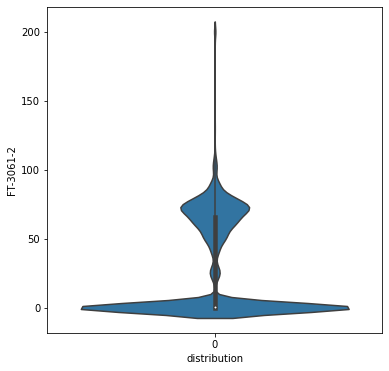

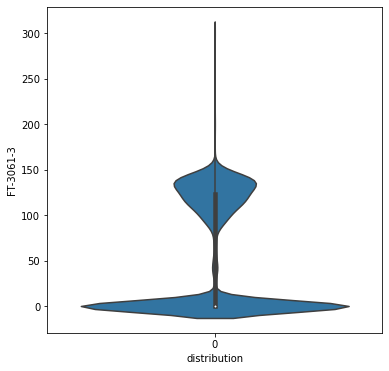

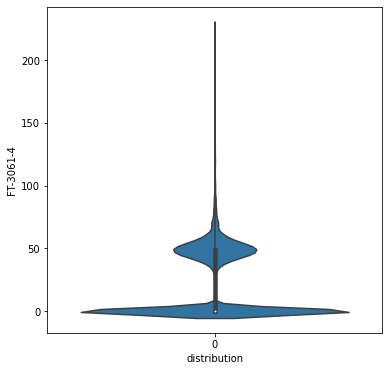

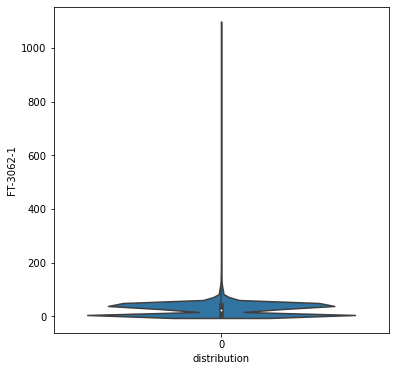

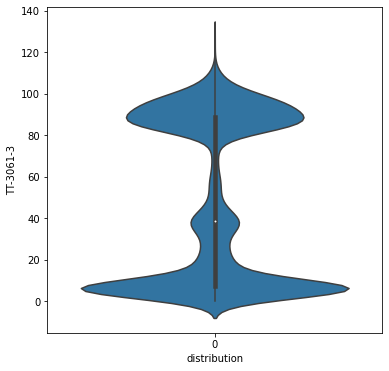

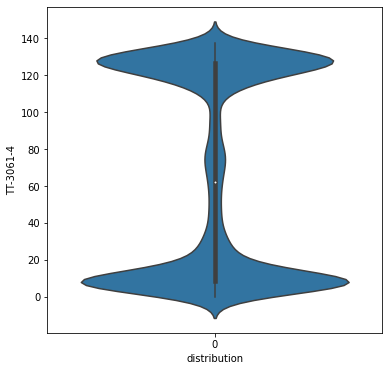

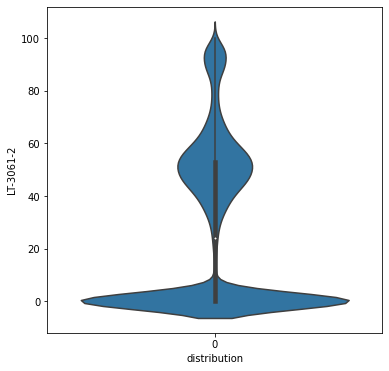

In [6]:
plot_var = process_var

graph.violin(raw_data, plot_var)

## data clustering

# Data preparation

In [22]:
from src import rnn
import numpy as np

history_length = 60
future_length = 20
step = 1

history
history_var = [, ]
future_var = ["TT-3061-3", "TT-3061-4", "LT-3061-2"]

history_series = []
future_series = []

for i in range(num_data):
    history, future = rnn.data2series(data_list[i], history_length, history_var, future_length, future_var,
                                      step, start_index=0, end_index=None)
    if not i:
        history_series = history
        future_series = future
    else:
        history_series = np.concatenate([history_series, history], axis=0)
        future_series = np.concatenate([future_series, future], axis=0)

In [26]:
print(f"history series: {history_series.shape}",
      f"future series: {future_series.shape}",
      sep='\n')

history series: (13834, 60, 7)
future series: (13834, 20, 3)
